<a href="https://colab.research.google.com/github/Caramel96/Samuel_BuckbyCE888/blob/main/LAB_6/Week6_exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import cluster, datasets, metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
df_country = pd.read_csv('https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/Country-data.csv')
df_dictionary = pd.read_csv('https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/data-dictionary.csv')

In [3]:
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df_dictionary

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [5]:
X = df_country.iloc[:,1:]
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

## Although i am looking to use 3 clusters i check the optimal k using the Elbow Method 

In [6]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

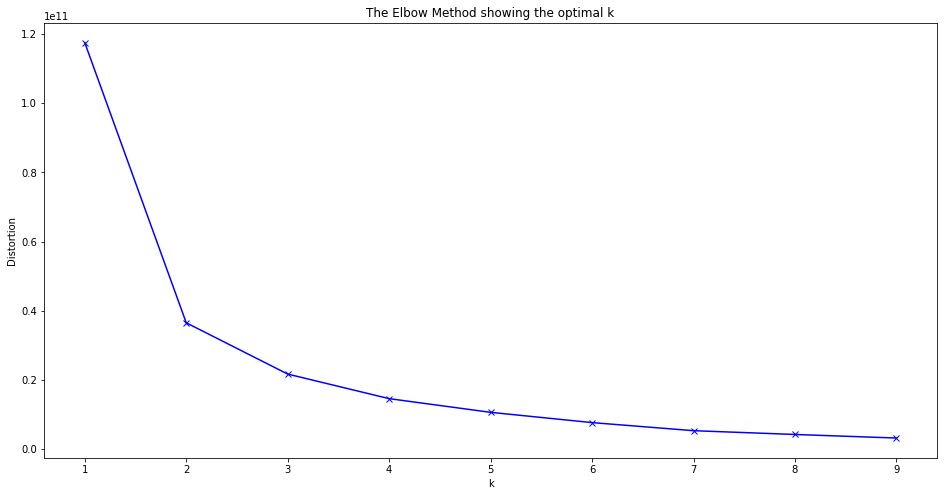

In [7]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [8]:
km = cluster.KMeans(n_clusters=3)
km.fit(X)
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
pca = PCA()
X_train_pca = pca.fit_transform(X_scaled)
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

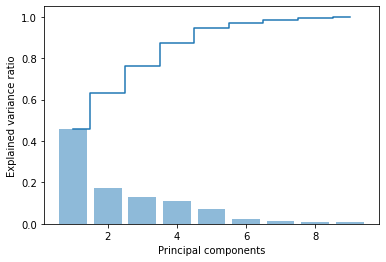

In [11]:
plt.bar(range(1, 10), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 10), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.savefig('PCA_WINE.png', dpi=300)
plt.show()

## As the explained variance gets extremely low at 6 componants i chose 5 n_componants

In [12]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211])

## Here i am checking which countries fall into which cluster to determin the labels. 

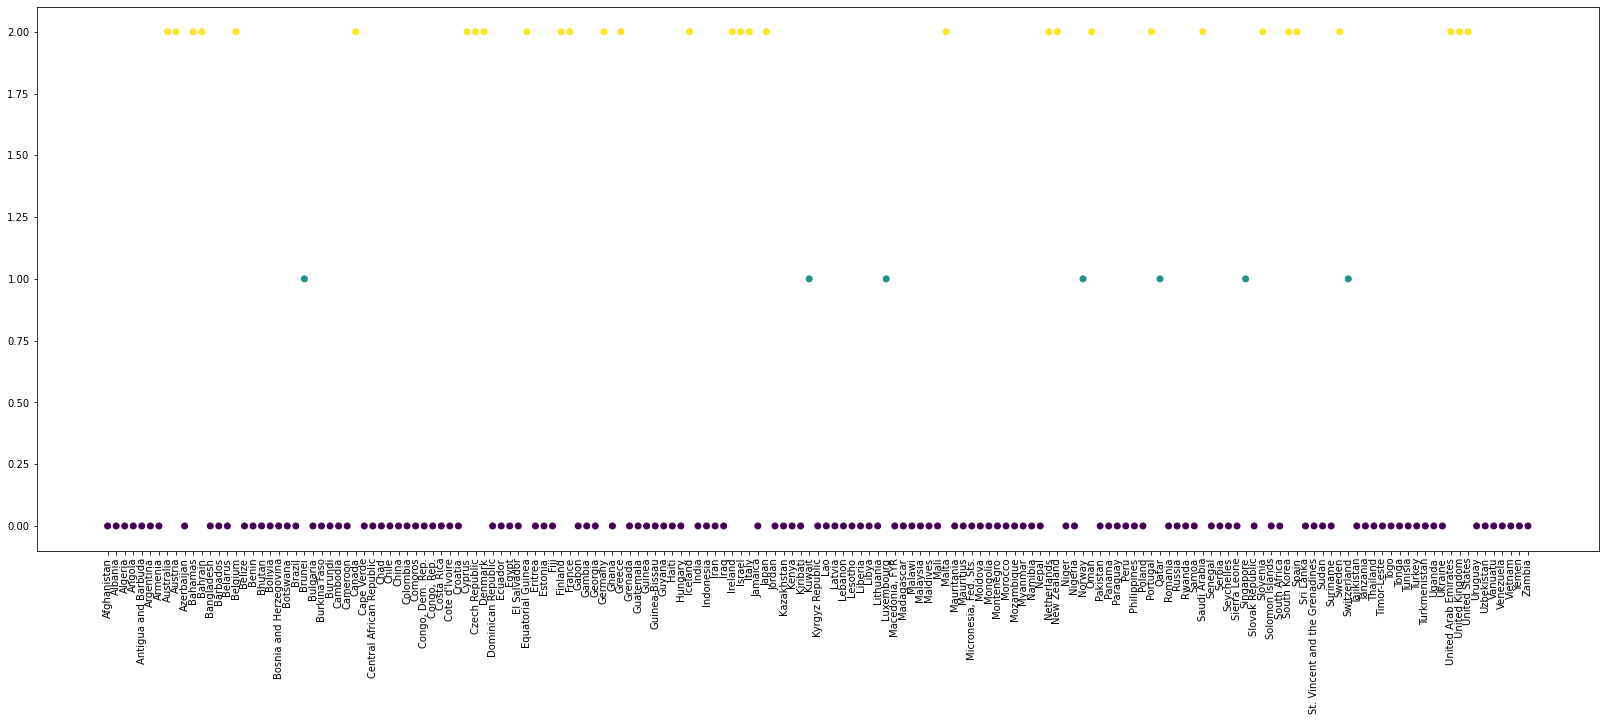

In [13]:
plt.figure(figsize=(28,10))
plt.scatter(df_country['country'],y=km.labels_, c=km.labels_)
plt.xticks(rotation=90)
plt.show()

In [14]:
label = ['developed country' if l==0 else 'developing country' if l==1 
         else 'under developed country' for l in km.labels_]

In [15]:
df_result = pd.DataFrame({'country': df_country['country'], 'label': label})
df_result['label'].value_counts()

developed country          128
under developed country     32
developing country           7
Name: label, dtype: int64

The distribution between under developed, developing and developed countires seems accurate here 

In [16]:
print('Developed Countries')
df_result.loc[df_result['label'] == 'developed country', 'country']


Developed Countries


0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 128, dtype: object

In [17]:
print('Developing Countries')
df_result.loc[df_result['label'] == 'developing country', 'country']

Developing Countries


23          Brunei
82          Kuwait
91      Luxembourg
114         Norway
123          Qatar
133      Singapore
145    Switzerland
Name: country, dtype: object

In [18]:
print('Under Developing Countries')
df_result.loc[df_result['label'] == 'under developing country', 'country']

Under Developing Countries


Series([], Name: country, dtype: object)

The outcome labels also seem acurate

In [19]:
df_result.to_csv('result_exercise7.csv', index=False)